### Check and draw diagram using Single Dice (Probability Distribution)

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# Make a list and fill random dice value
list = []
#random.seed(42)
for i in range(10000):
    list.append(random.randint(1, 6))

In [3]:
# first first 4 element
list[:5]

[6, 1, 3, 5, 3]

In [4]:
value_count = pd.Series(list).value_counts()
s = (value_count / value_count.sum()).sort_index()
s

1    0.1656
2    0.1665
3    0.1694
4    0.1685
5    0.1718
6    0.1582
Name: count, dtype: float64

<Axes: >

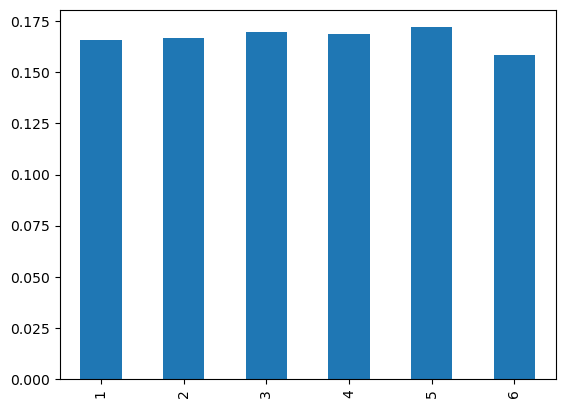

In [5]:
# Plot bar chart
s.plot(kind='bar')

### Check and draw diagram using 2 Dice (Probability Distribution)

In [6]:
multiple_dice_list = []
for i in range(10000):
    a = random.randint(1, 6)
    b = random.randint(1, 6)
    multiple_dice_list.append(a + b)

In [7]:
multiple_dice_list[:5]

[6, 11, 4, 4, 10]

In [8]:
value_counts = pd.Series(multiple_dice_list).value_counts()
series = (value_counts / value_counts.sum()).sort_index()

In [9]:
np.cumsum(s) #Calculating CDF

1    0.1656
2    0.3321
3    0.5015
4    0.6700
5    0.8418
6    1.0000
Name: count, dtype: float64

<Axes: >

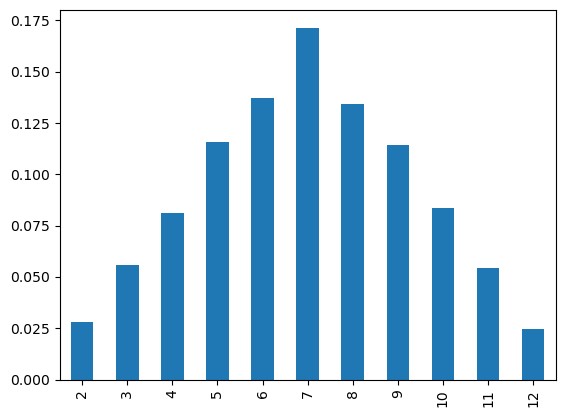

In [10]:
series.plot(kind = 'bar')

<Axes: >

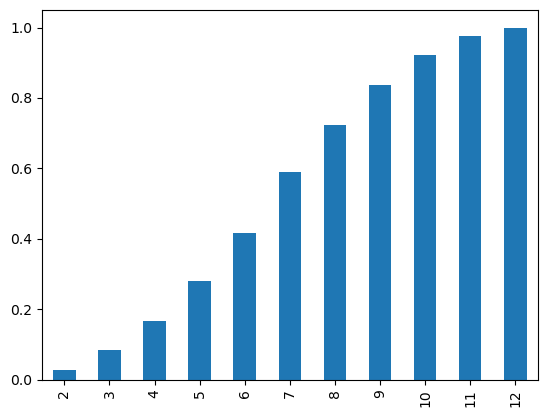

In [11]:
np.cumsum(series).plot(kind='bar')

### Parametric Dendity Estimation(PDF)

In [12]:
import matplotlib.pyplot as plt
from numpy.random import normal

In [13]:
# Get random 1000 records with mean 50 and scale 5
sample = normal(loc=50, scale=5, size=1000)

In [14]:
sample.mean()

np.float64(50.27804573182945)

(array([  5.,  39.,  68., 168., 260., 245., 131.,  61.,  20.,   3.]),
 array([34.96202634, 38.13043841, 41.29885048, 44.46726255, 47.63567462,
        50.80408669, 53.97249876, 57.14091083, 60.30932289, 63.47773496,
        66.64614703]),
 <BarContainer object of 10 artists>)

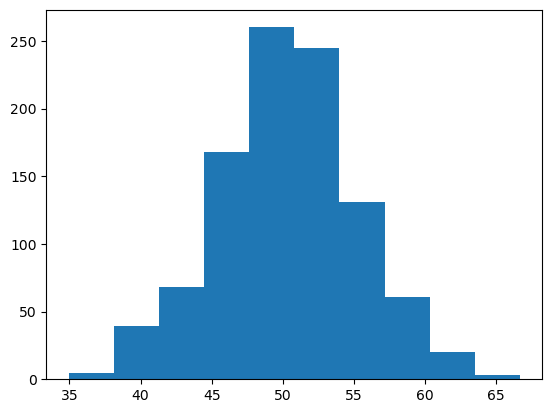

In [15]:
# histogram plaot to understand distribution of data
plt.hist(sample, bins=10)

In [16]:
sample_mean = sample.mean()
sample_std_div = sample.std()

In [17]:
sample_mean, sample_std_div

(np.float64(50.27804573182945), np.float64(4.909917279818005))

In [18]:
#fit the distribution with above calculated mean and std_div
from scipy.stats import norm

dist = norm(60, 12)

In [19]:
values = np.linspace(sample.min(), sample.max(), 100)

In [20]:
sample.max(), sample.min()

(np.float64(66.64614703284136), np.float64(34.96202634323295))

In [21]:
probabilities = [dist.pdf(value) for value in values]

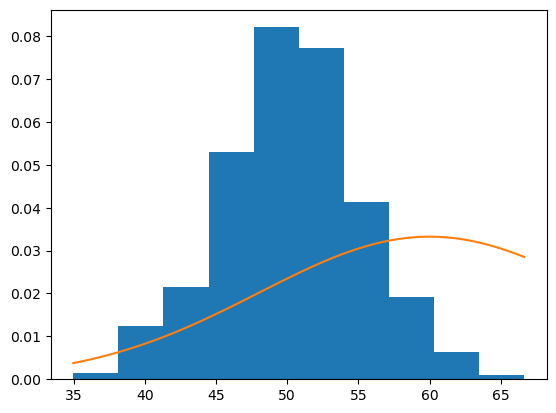

In [22]:
#Plt the histogram and PDf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

/var/folders/6l/9g6t4kp90gn4973plz_3k_c00000gn/T/ipykernel_62955/1421526367.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

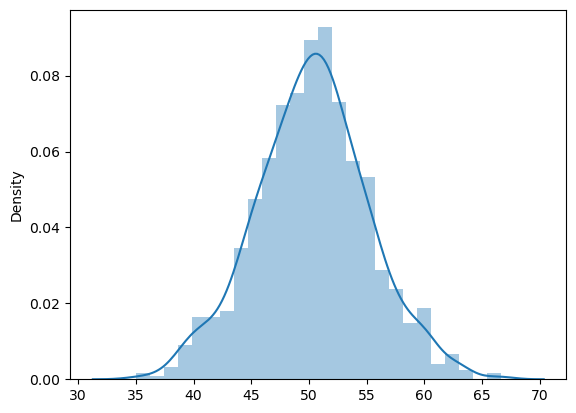

In [23]:
# We can get the same result with seaborn without calculating above stuff ourself
import seaborn as sns
sns.distplot(sample)

### Kernel Density Estimation (KDE)

In [24]:
# Generate sample data
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

(array([ 1.,  0.,  1.,  1.,  1.,  1.,  2.,  3.,  9.,  7., 10., 14., 17.,
        18., 31., 16., 12., 20., 21., 22., 22., 17., 12., 15., 18.,  8.,
        11.,  9., 20., 14., 11., 36., 48., 37., 34., 49., 51., 54., 51.,
        59., 43., 40., 43., 27., 24., 13.,  8.,  9.,  5.,  5.]),
 array([ 2.55785278,  3.55266524,  4.54747769,  5.54229015,  6.5371026 ,
         7.53191506,  8.52672751,  9.52153997, 10.51635242, 11.51116488,
        12.50597733, 13.50078979, 14.49560224, 15.4904147 , 16.48522715,
        17.48003961, 18.47485206, 19.46966452, 20.46447697, 21.45928943,
        22.45410188, 23.44891434, 24.44372679, 25.43853925, 26.4333517 ,
        27.42816416, 28.42297661, 29.41778907, 30.41260152, 31.40741398,
        32.40222643, 33.39703889, 34.39185134, 35.3866638 , 36.38147625,
        37.37628871, 38.37110116, 39.36591362, 40.36072607, 41.35553853,
        42.35035098, 43.34516344, 44.33997589, 45.33478835, 46.3296008 ,
        47.32441326, 48.31922571, 49.31403817, 50.30885062,

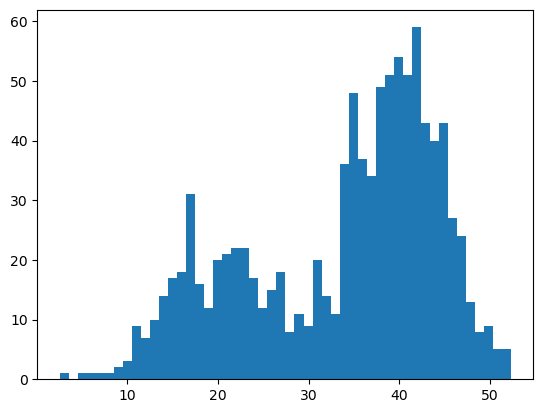

In [25]:
plt.hist(sample, bins=50)

In [26]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

#convert 1-D array to 2-D because model won't support 1-D

sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [27]:
values = np.linspace(sample.min(), sample.max(), 100) # Generate 100 random number in b/w min and max value of sample
values = values.reshape((len(values), 1))

In [28]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities) # score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate

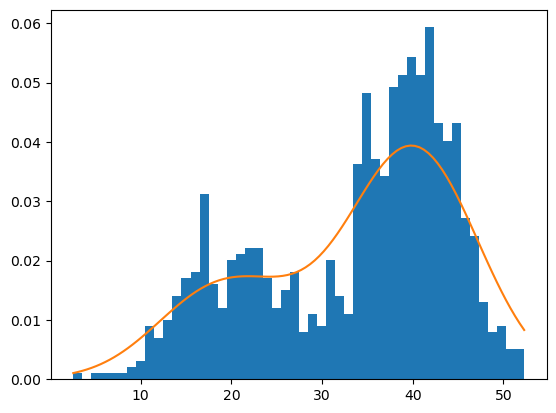

In [29]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)

In [30]:
df = sns.load_dataset('iris')

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

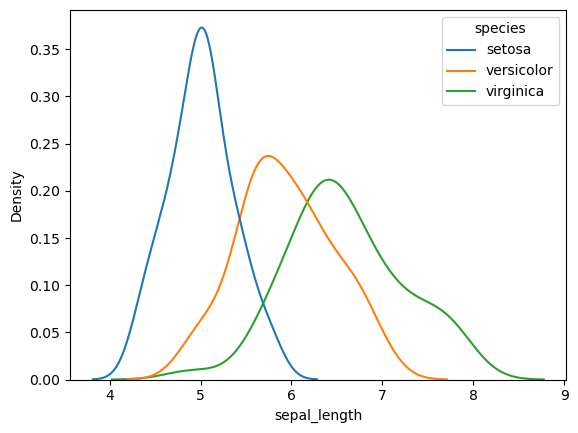

In [32]:
sns.kdeplot(data=df, x='sepal_length', hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

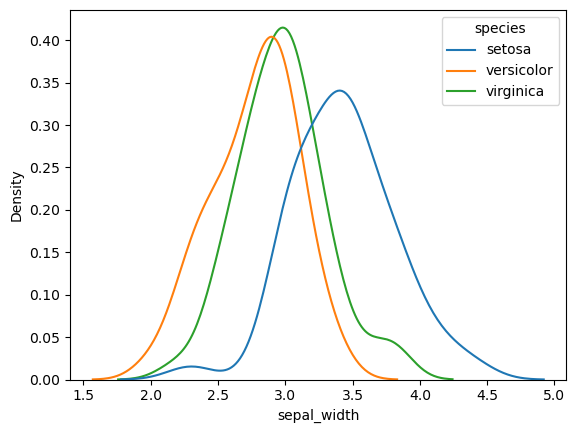

In [33]:
sns.kdeplot(data=df, x='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

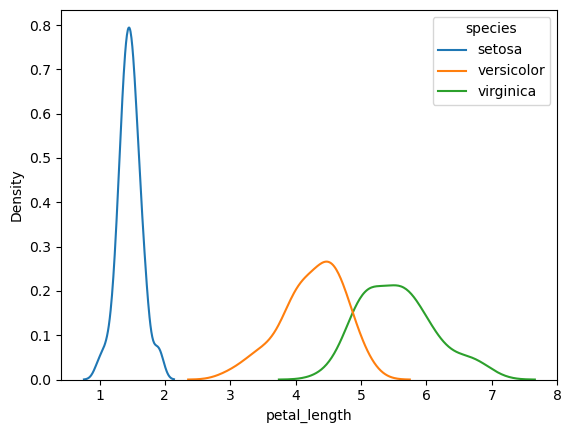

In [34]:
sns.kdeplot(data=df, x='petal_length', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

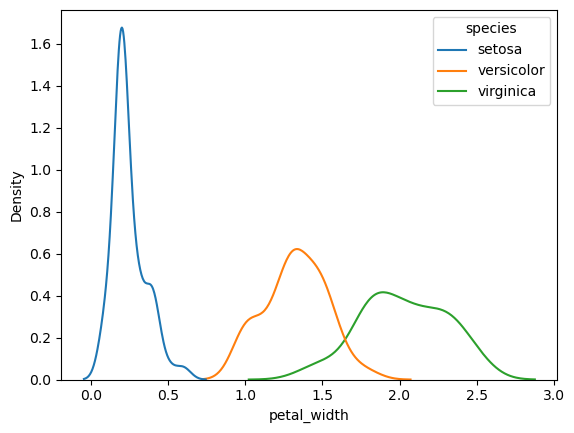

In [35]:
sns.kdeplot(data=df, x='petal_width', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

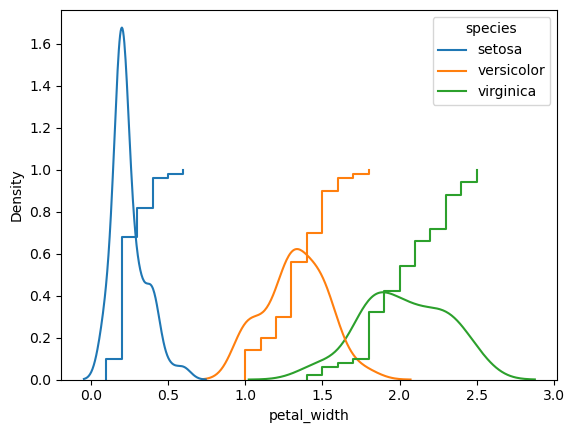

In [40]:
sns.kdeplot(data=df, x='petal_width', hue='species')
sns.ecdfplot(data=df, x='petal_width', hue='species')

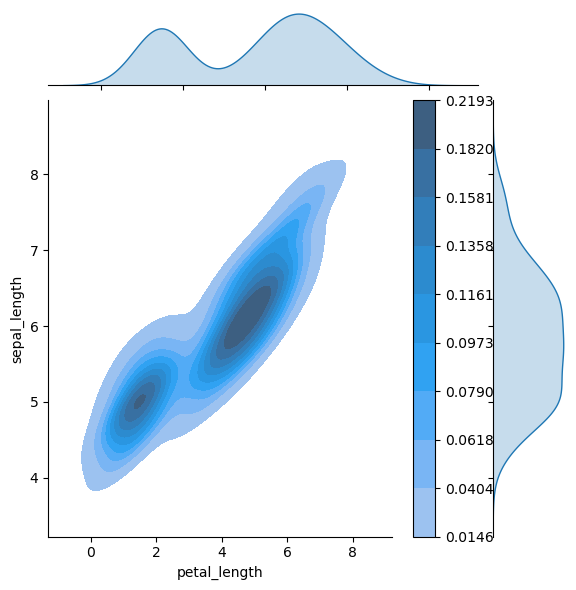

In [42]:
sns.jointplot(data=df, x='petal_length', y='sepal_length', kind='kde', fill= True, cbar=True) #Example of 2-D plot

In [43]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [44]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

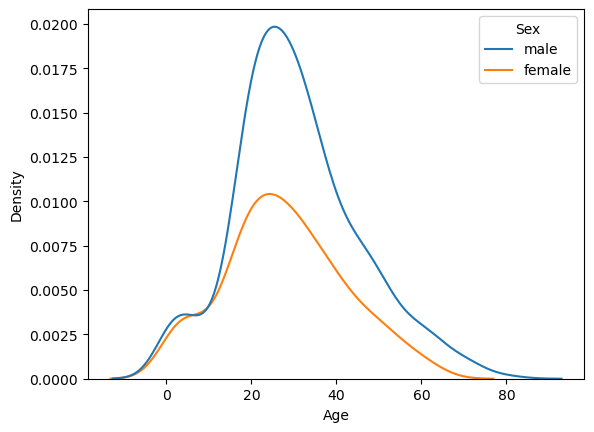

In [45]:
sns.kdeplot(data=titanic, x='Age', hue='Sex')